In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
ndata = pd.read_csv('../input/netflix-shows/netflix_titles.csv', index_col = 'show_id', parse_dates=[5])

In [3]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
ndata.dtypes
ndata.shape
print(ndata.isnull().sum())
ndata[ndata.duplicated()]  # no duplicate data is avaliable.




type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


# Data Cleaning.

In [5]:
# Director
ndata[ndata.director.isnull()]
#lets fill missing values with Unknown
ndata.director.fillna('Unknown', inplace = True)
ndata.isnull().sum()
ndata.director.describe()

count        8807
unique       4529
top       Unknown
freq         2634
Name: director, dtype: object

In [6]:
# Cast, 825 are NaN
ndata.cast.dtype
ndata.cast.describe()
ndata[ndata.cast.isnull()]
# it think, filling will Unknown would be good.
ndata.cast.fillna("Unknown", inplace = True)
ndata.cast.isnull().sum()

0

In [7]:
# Country, 831 NaN values.
ndata.country.describe()
ndata.country.fillna('Unknown', inplace = True )
ndata.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [8]:
ndata.date_added.isnull().sum()
ndata.date_added.fillna(99, inplace = True)
ndata.date_added = pd.to_datetime(ndata.date_added)
ndata.date_added.isnull().sum()

0

In [9]:
# Rating, 4 NaN values
ndata.rating.dtype
ndata.rating.describe()
# filling with mode, would be suitable.
n = ndata.rating.mode()[0]
print(n)
ndata.rating.fillna(n, inplace = True)
ndata.rating.isnull().sum()


TV-MA


0

In [10]:
# Duration, 3 NaN values
ndata.duration.describe()
ndata.duration.mode()
# let's fill with mode value
ndata.duration.fillna(ndata.duration.mode()[0], inplace = True)
ndata.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Transformation of Some Columns

In [11]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
# let's have a look on listed_in
ndata.listed_in.describe()
ndata.description.describe()
# I think listed_in and Description are not as much beneficial as rest, so let's drop these features.
ndata.drop('listed_in', axis=1, inplace = True)
ndata.drop('description', axis=1, inplace = True)


# Insights 

In [13]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons


# Question # 1 
## Those Years, in which most movies were created


In [14]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons


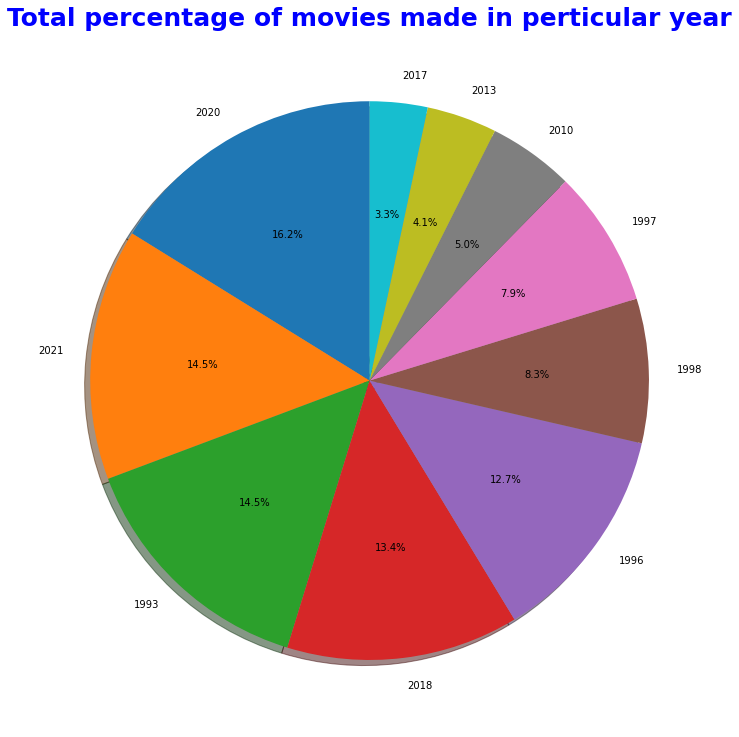

In [15]:
plt.figure(figsize=(10,15))
total = ndata.release_year.value_counts()
years= ndata.release_year.unique()
data= total[:10]
labels = years[:10]
plt.pie(data, labels= labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Total percentage of movies made in perticular year', weight = 'bold', size =25, color='b')
plt.tight_layout()
plt.show()


## Which Top countries are used for creating TV shows and movies

In [16]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons


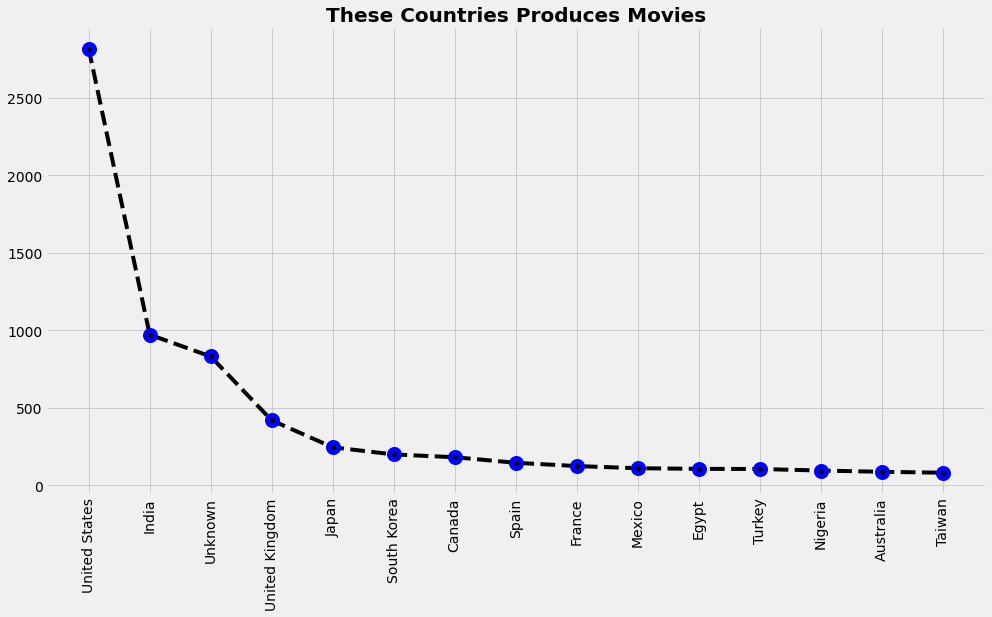

In [17]:
tvm= ndata.country.value_counts()[:15]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15 ,8))
plt.plot(tvm, linestyle='--', marker='o', ms=10, mec='b', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('These Countries Produces Movies', size =20, weight = 'bold')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


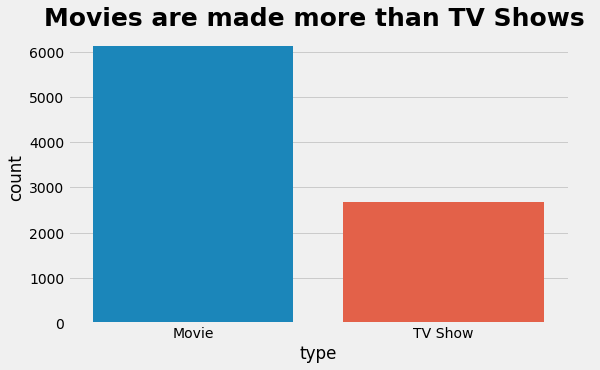

In [18]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
sns.countplot(ndata.type)
plt.title('Movies are made more than TV Shows ', weight = 'bold', size= 25)
plt.show()


## Types of rating and insights.



In [19]:
ndata.head()

,type,title,director,cast,country,date_added,release_year,rating,duration
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons


In [20]:
ndata.rating.unique()
ndata.rating = ndata.rating.replace({'PG-13':'unsuitable for children', 'TV-MA':"unsuitable for children", 
                                     'PG':'parental guidance', 'TV-14':'unsuitable for children',
                                     'TV-Y':'suitable for children', 'TV-Y7':'suitable for children',
                                     'R':'unsuitable for children','TV-G':'suitable for children',
                                    'G':'General Audiences', 'NC-17':'unsuitable for children', 'NR':'Not Rated', 'TV-PG':'parental guidance'})

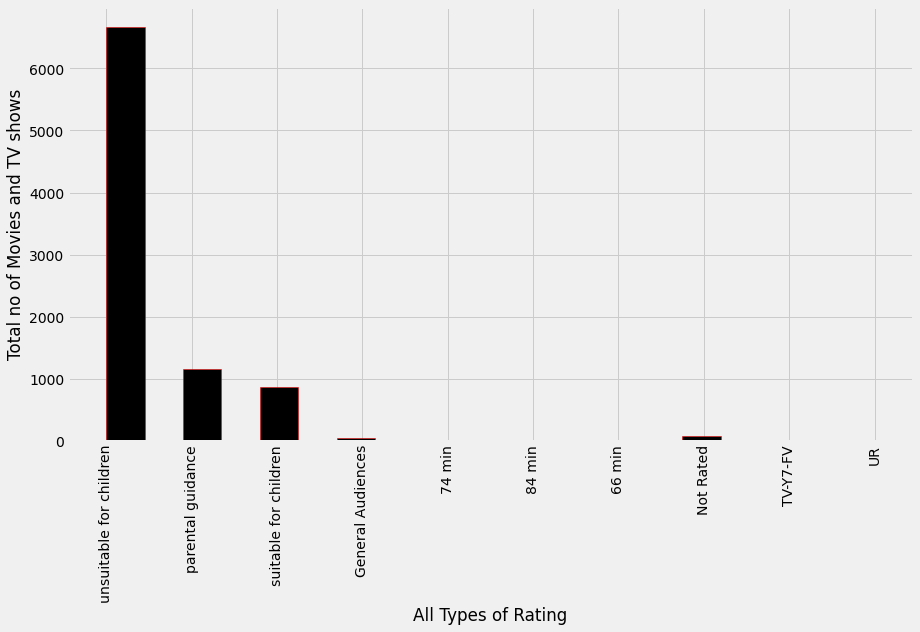

In [21]:
plt.figure(figsize=(13,7))
plt.hist(ndata.rating, color = 'k', edgecolor='r', bins= 20)
plt.xlabel('All Types of Rating')
plt.ylabel('Total no of Movies and TV shows')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()